***1- Introduction***

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In this file, I use *Seaborn*, *Pandas*, *NumPy*, and *TensorFlow* to perform analytical tasks on a Cardiovascular diseases dataset to identify effects of various factors on it. The dataset consists of important features from approximately 900 patients, such as age, sex, resting blood pressure, fasting blood sugar and more.

***2- Data Analysing***

At the very fist step, It's essential to import some frameworks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

Since dataset is in csv format, it's better to handle it with *Pandas*.

In [4]:
df = pd.read_csv('heart.csv')

Now it's time to see some of the main features of dataset.

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.duplicated().sum()

0

In [12]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.shape

(918, 12)

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Since some columns have non-numeric value, I need to convert them to numerical values.

In [20]:
df['Sex'] = df['Sex'].map({'M':0, 'F':1})
df['ChestPainType'] = df['ChestPainType'].map({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3})
df['RestingECG'] = df['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})
df['ST_Slope'] = df['ST_Slope'].map({'Flat':0, 'Up':1, 'Down':2})

We should split our dataset into 80% for training and 20% for testing to ensure the model learns patterns effectively while reserving a portion for evaluating its performance on unseen data, preventing overfitting and ensuring proper validation. I use Scikit Learn for this purpose.

In [22]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print(train_df.shape)
print(test_df.shape)

(734, 12)
(184, 12)


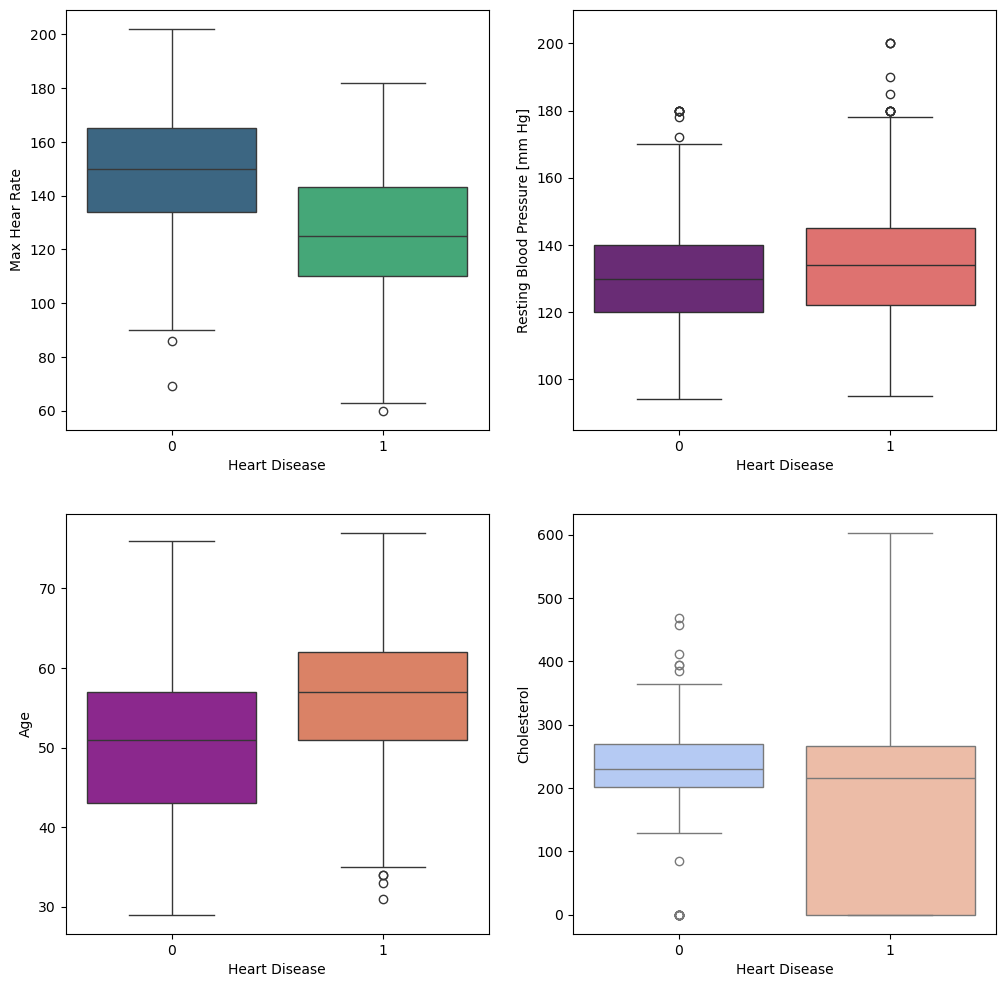

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'MaxHR', palette = 'viridis', ax = axs[0,0])
axs[0,0].set_xlabel('Heart Disease')
axs[0,0].set_ylabel('Max Hear Rate')
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'RestingBP', palette = 'magma', ax = axs[0,1])
axs[0,1].set_xlabel('Heart Disease')
axs[0,1].set_ylabel('Resting Blood Pressure [mm Hg]')
axs[0,1].set_ylim(85,)
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'Age', palette = 'plasma', ax = axs[1,0])
axs[1,0].set_xlabel('Heart Disease')
axs[1,0].set_ylabel('Age')
sns.boxplot(data = train_df, x = 'HeartDisease', y = 'Cholesterol', palette = 'coolwarm', ax = axs[1,1])
axs[1,1].set_xlabel('Heart Disease')
axs[1,1].set_ylabel('Cholesterol')
plt.show()

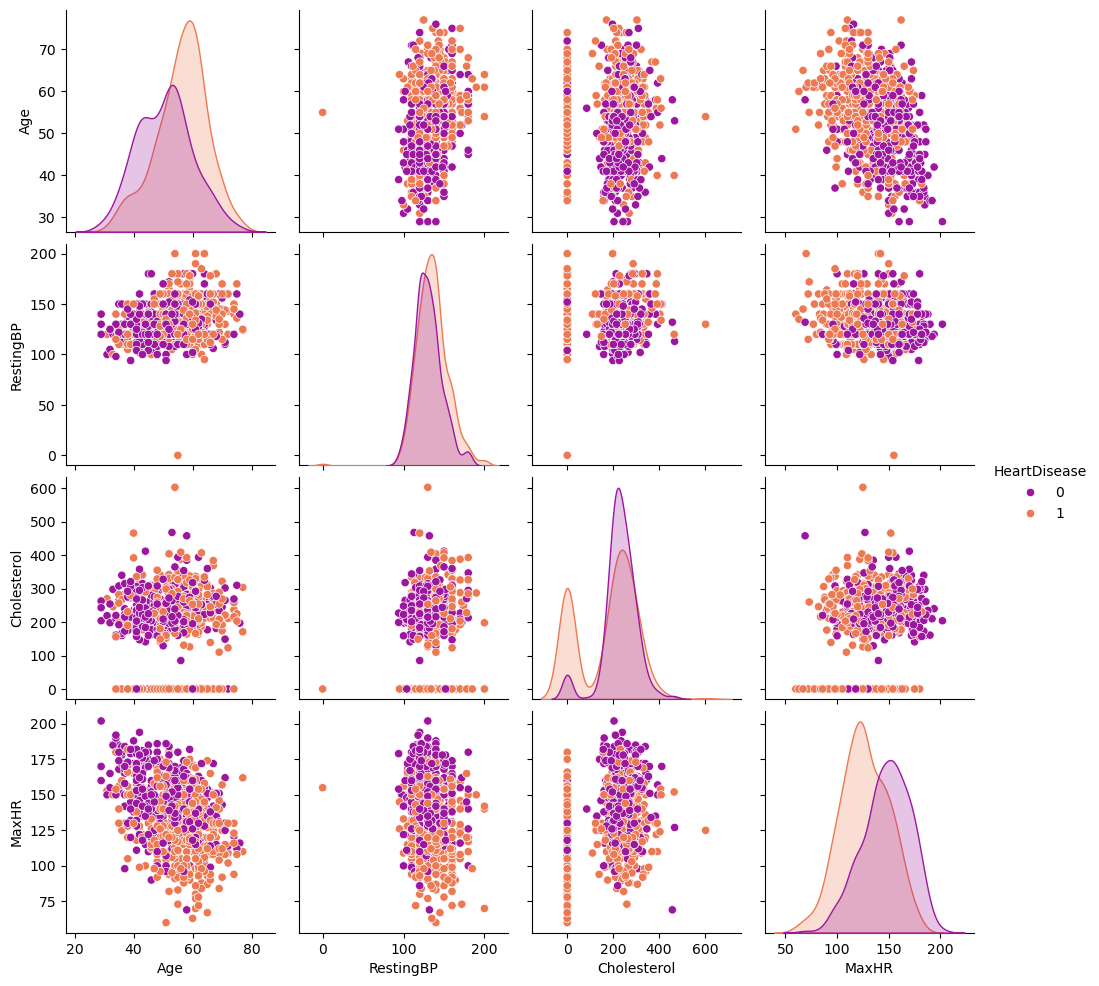

In [26]:
sns.pairplot(train_df, vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], hue = 'HeartDisease', palette = 'plasma')
plt.show()

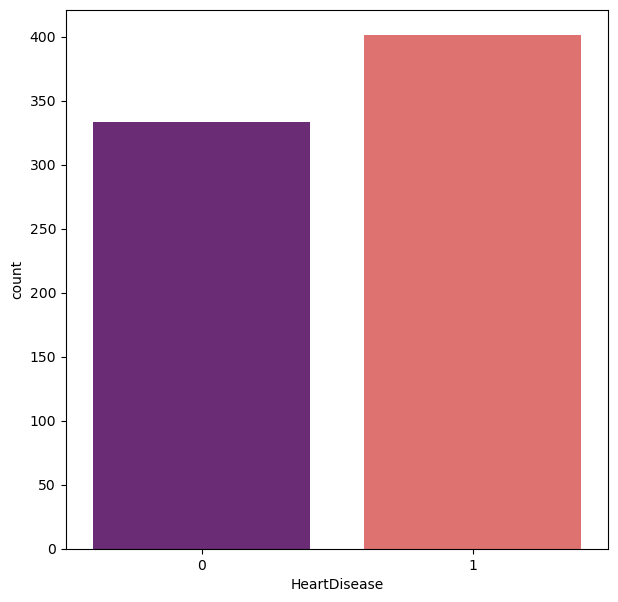

In [28]:
plt.figure(figsize = (7,7))
sns.countplot(data = train_df, x = 'HeartDisease', palette = 'magma')
plt.show()

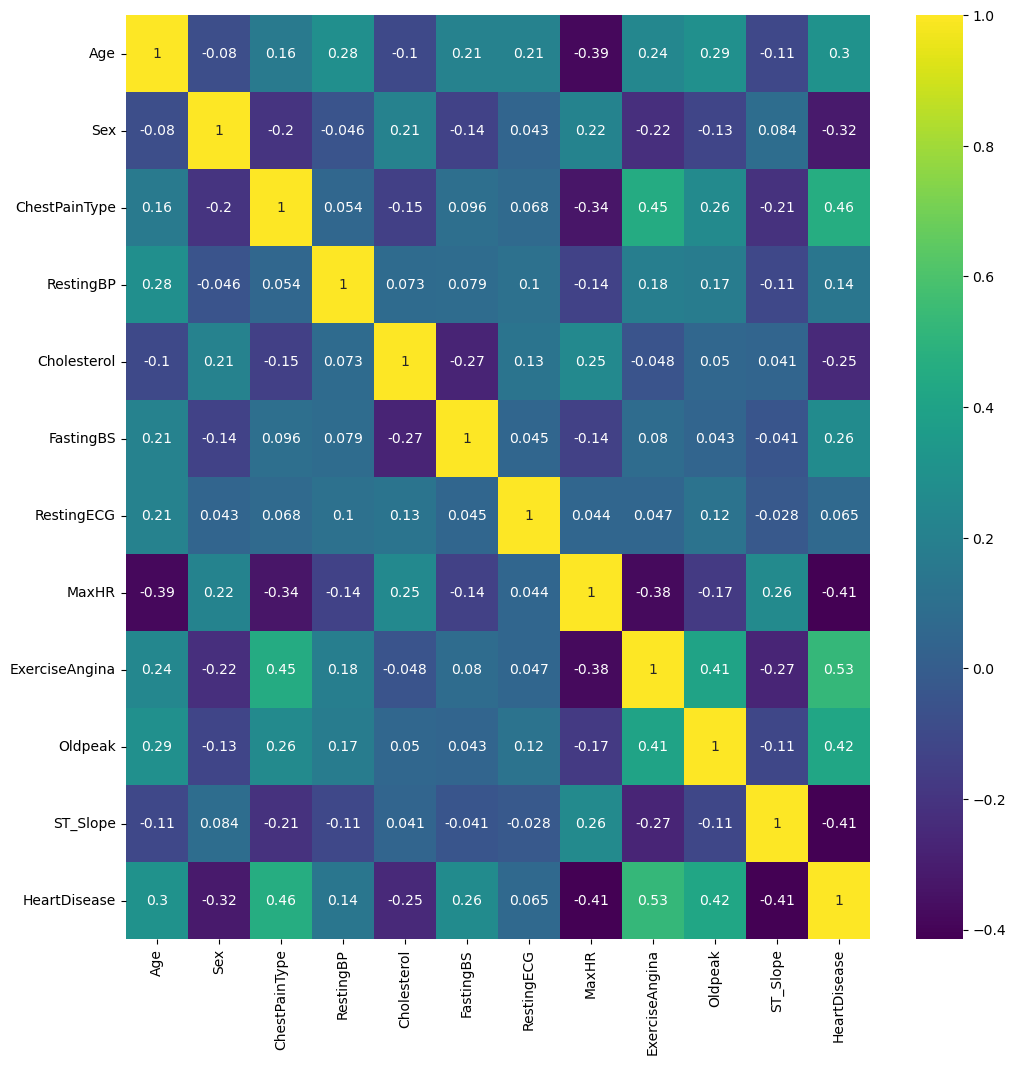

In [30]:
plt.figure(figsize = (12,12))
sns.heatmap(train_df.corr(numeric_only = True), annot = True, cmap = 'viridis')
plt.show()

***3- Model***

Now, it's time to build a model to predict heart disease in future patients.

I want to train 2 model, one of them by *Scikit Learn* and the other one by a simple *Neral Network* with 4 hidden layers and total of 35 neurons and then compare the results together.

*3-1- Nueral Network*
    
First, we train a neural network model.

In [32]:
feature = train_df.drop('HeartDisease', axis = 1).to_numpy()
outcome = train_df['HeartDisease'].to_numpy()

norm = tf.keras.layers.Normalization(axis = -1)
norm.adapt(feature)
norm_feat = norm(feature)

tf.random.set_seed(1234)

model = Sequential(
    [
        tf.keras.Input(shape = (11,)),
        Dense(16, activation = 'sigmoid', name = 'L1'),
        Dense(13, activation = 'sigmoid', name = 'L2'),  
        Dense(5, activation = 'sigmoid', name = 'L3'),
        Dense(1, activation = 'sigmoid', name = 'L4')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 13)             │           221 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 5)              │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489 (1.91 KB)

 Trainable params: 489 (1.91 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.095),
    metrics = ['accuracy']
)

model.fit(
    norm_feat, outcome,
    epochs = 15
)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6847 - loss: 0.6063
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8317 - loss: 0.4424
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8596 - loss: 0.3758
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8563 - loss: 0.3408
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8564 - loss: 0.3329
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8677 - loss: 0.3247
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8739 - loss: 0.3212
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.3207
Epoch 9/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8697 - loss: 0.3175
Epoch 10/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8783 - loss: 0.2992
Epoch 11/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8891 - loss: 0.3000
Epoch 12/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8893 - 

Now, accuracy of model using test dataset should be examined. For this purpose, *Confusion Matrix* and some other method like *recall* and *F1* can be very useful.

In [36]:
test_feat = test_df.drop('HeartDisease', axis = 1).to_numpy()
test_outcome = test_df['HeartDisease'].to_numpy()

test_feat_norm = norm(test_feat)

test_loss, test_accuracy = model.evaluate(test_feat_norm, test_outcome, verbose = 1)
test_accuracy = test_accuracy*100
print(f'Accuracy on test set is {test_accuracy:0.3f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8292 - loss: 0.4315 
Accuracy on test set is 85.870


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


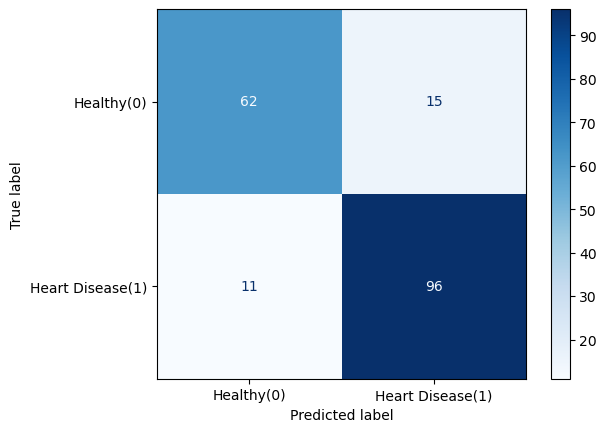

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.85      0.81      0.83        77
Heart Disease(1)       0.86      0.90      0.88       107

        accuracy                           0.86       184
       macro avg       0.86      0.85      0.85       184
    weighted avg       0.86      0.86      0.86       184



In [38]:
y_pred_prob = model.predict(test_feat_norm)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()
cm = confusion_matrix(test_outcome, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Blues)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(test_outcome, y_pred, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

*3-2- Scikit Learn*

In this section, I use *Scikit Learn* to train a simple model and then I examine accuracy of model.

In [40]:
lr_model = LogisticRegression()
lr_model.fit(norm_feat, outcome)

LogisticRegression()

In [42]:
y_pred_lr = lr_model.predict(test_feat_norm)
accuracy = lr_model.score(test_feat_norm, test_outcome)
print(f'Accuracy using Scikit Learn is: {accuracy*100:0.3f}')

Accuracy using Scikit Learn is: 84.783


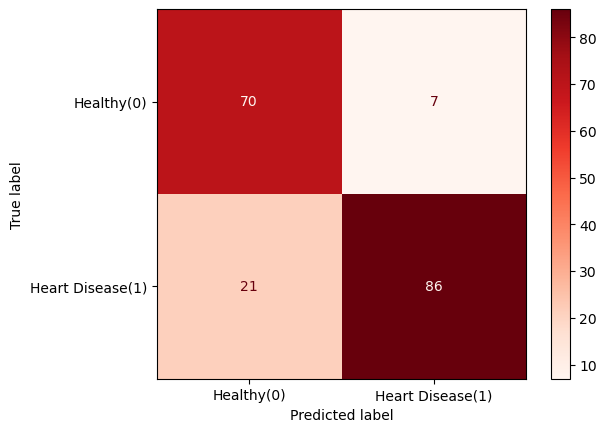

--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      Healthy(0)       0.77      0.91      0.83        77
Heart Disease(1)       0.92      0.80      0.86       107

        accuracy                           0.85       184
       macro avg       0.85      0.86      0.85       184
    weighted avg       0.86      0.85      0.85       184



In [44]:
conf_matrix = confusion_matrix(test_outcome, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Healthy(0)','Heart Disease(1)'])
disp.plot(cmap = plt.cm.Reds)
plt.show()
print('--------------------------------------------------------------------------------')

report = classification_report(test_outcome, y_pred_lr, target_names = ['Healthy(0)','Heart Disease(1)'])
print(report)

***4- Conclusion***

In final step, making a comparison between accuracy of each model is helpful.

It's clear that *Neural Network* model performance on unseen data is slightly better than *Scikit Learn* model. 

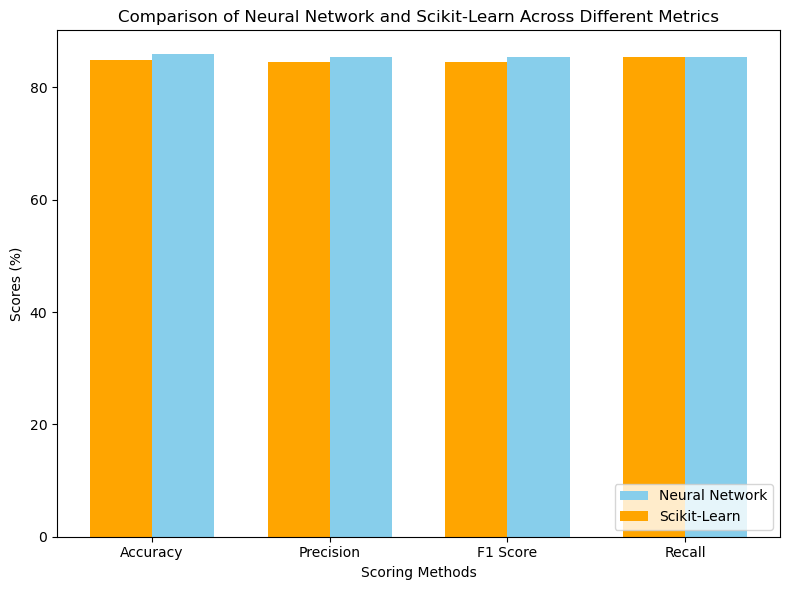

In [46]:
methods = ['Accuracy', 'Precision','F1 Score', 'Recall']
neural_network = [85.87, 85.5, 85.5, 85.5] 
scikit_learn = [84.87, 84.5, 84.5, 85.5]   

x = np.arange(len(methods)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x + width/2, neural_network, width, label='Neural Network', color='skyblue')
bars2 = ax.bar(x - width/2, scikit_learn, width, label='Scikit-Learn', color='orange')

ax.set_xlabel('Scoring Methods')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Neural Network and Scikit-Learn Across Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

***Thanks for your attention!***

*Contact me: mhbf8@yahoo.com*